In [1]:
!pip install pyspark
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .master('local[*]') \
    .appName("PySpark_Stepic_Tutorials") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

import numpy as np
import pandas as pd
#Функция для передачи результата sql-запроса в pandas DataFrame.
#Напиши select = """ SELECT * FROM table""" и вызови функцию sql(select)
def sql(select):
    SQLdf = spark.sql(select)
    return SQLdf.toPandas()

import pyspark.sql.functions as F

from google.colab import data_table
data_table.disable_dataframe_formatter()

spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=2ebb54ce66bea6e91eedd7a741a33cc2eb8e4f40861e209cae4fac7d61b1d747
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


# <font color='yellow'>Чтение данных

Используя spark.read мы может считывать данные из файлов различных форматов, таких как CSV, JSON, Parquet и других. Вот несколько примеров получения данных из файлов:

In [2]:
# spark.read.csv
# spark.read.json
# spark.read.parquet

# <font color='yellow'>Запись/сохранение данных в файл

Метод write.save() используется для сохранения данных в различных форматах, таких как CSV, JSON, Parquet и других. Давайте рассмотрим, как записать данные в файлы разных форматов. Мы можем сохранить как все строки, так и только выбранные с помощью метода select()

In [3]:
# # CSV
# data.write.csv('dataset.csv')

# # JSON
# data.write.save('dataset.json', format='json')

# # Parquet
# data.write.save('dataset.parquet', format='parquet')

In [4]:
#df.columns

In [5]:
#df.select(['_c0', '_c1', '_c2']).write.csv('dataset_part.csv')

# <font color = 'yellow'>Структурирование данных с помощью схемы Spark

In [6]:
path = '/content/drive/MyDrive/stocks_price_final.csv'
data = spark.read.csv(path, sep = ',', header=True)

In [7]:
data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [8]:
data.show(2)

+---+------+----------+-----+------+---------+-----+-------+--------+----------+-------------+--------------------+--------+
|_c0|symbol|      date| open|  high|      low|close| volume|adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+-----+------+---------+-----+-------+--------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|   54|    58|       51|52.75|7326300|   52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|52.75|54.355|49.150002|52.27|1025200|   52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
+---+------+----------+-----+------+---------+-----+-------+--------+----------+-------------+--------------------+--------+
only showing top 2 rows



Примечание: видим, что некоторые поля содержат числовые данные, но в схеме они определились как строки. Чтобы изменить это на начальном этапе - используем свою схему

In [9]:
from pyspark.sql.types import *

In [10]:

data_schema =[

               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('date', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True)]

In [11]:
final_structure = StructType(fields=data_schema)

In [12]:
data = spark.read.csv(path=path, schema=final_structure, sep=',', header=True)
data.show(10)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [13]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



# <font color = 'yellow'> Различные методы инспекции данных

In [14]:
# schema(): этот метод возвращает схему данных (фрейма данных). Ниже показан пример с ценами на акции

In [15]:
data.schema

StructType([StructField('_c0', IntegerType(), True), StructField('symbol', StringType(), True), StructField('date', DateType(), True), StructField('open', DoubleType(), True), StructField('high', DoubleType(), True), StructField('low', DoubleType(), True), StructField('close', DoubleType(), True), StructField('volume', IntegerType(), True), StructField('adjusted', DoubleType(), True), StructField('market.cap', StringType(), True), StructField('sector', StringType(), True), StructField('industry', StringType(), True), StructField('exchange', StringType(), True)])

In [16]:
# dtypes возвращает список кортежей с именами столбцов и типами данных

In [17]:
data.dtypes

[('_c0', 'int'),
 ('symbol', 'string'),
 ('date', 'date'),
 ('open', 'double'),
 ('high', 'double'),
 ('low', 'double'),
 ('close', 'double'),
 ('volume', 'int'),
 ('adjusted', 'double'),
 ('market.cap', 'string'),
 ('sector', 'string'),
 ('industry', 'string'),
 ('exchange', 'string')]

In [18]:
# show() по умолчанию отображает первые 20 строк,
# а также принимает число в качестве параметра для выбора их количества

In [19]:
data.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [20]:
# head(n) возвращает n строк в виде списка

In [21]:
data.head(10)

[Row(_c0=1, symbol='TXG', date=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', date=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, symbol='TXG', date=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=4, symbol='TXG', date=datetime.date(2019, 9, 17), open=56.209999, high=60.900002, low=55.423, close=56.779999, volume=602800, adjusted=56.779999, market.cap='$9.31B', sector='Capit

In [22]:
# first() возвращает первую строку данных

In [23]:
data.first()

Row(_c0=1, symbol='TXG', date=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')

In [24]:
# take(n) возвращает первые n строк

In [25]:
data.take(3)

[Row(_c0=1, symbol='TXG', date=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', date=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, symbol='TXG', date=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')]

In [26]:
# describe() вычисляет некоторые статистические значения для столбцов с числовым типом данных

In [27]:
data.columns

['_c0',
 'symbol',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market.cap',
 'sector',
 'industry',
 'exchange']

In [28]:
data = data.withColumnRenamed('market.cap', 'market_cap')

In [29]:
data.columns

['_c0',
 'symbol',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market_cap',
 'sector',
 'industry',
 'exchange']

In [30]:
data.select('volume').describe()

DataFrame[summary: string, volume: string]

In [31]:
data.count()

1729034

In [32]:
data.distinct().count()

1729034

# <font color = "yellow"> Манипуляции со столбцами

In [33]:
data.columns

['_c0',
 'symbol',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market_cap',
 'sector',
 'industry',
 'exchange']

In [34]:
# Добавление столбца: используйте withColumn, чтобы добавить новый столбец к существующим.
# Метод принимает два параметра: имя столбца и данные

In [35]:
data = data.withColumn('new_column_date', data.date)

In [36]:
data.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+---------------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|new_column_date|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+---------------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|     2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|     2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|     2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999| 

In [37]:
# Обновление столбца: используйте withColumnRenamed, чтобы переименовать существующий столбец.
# Метод принимает два параметра: название существующего столбца и его новое имя.

In [38]:
data = data.withColumnRenamed('new_column_date', 'added_date')

In [39]:
data.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|added_date|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotec

In [40]:
# Удаление столбца: используйте метод drop, который принимает имя столбца и возвращает данные.

In [41]:
data = data.drop('added_date')

In [42]:
data.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [43]:
# Задача

# Прочитать уже знакомый нам датасет stocks_price_final;
# Создать в конце новый столбец new_volume с данными из столбца volume;
# Избавиться от следующих столбцов: symbol, close, volume , adjusted, market.cap, exchange;
# Поменять местами названия столбцов high и low;
# Столбец date переместить в конец;
# Вывести первую строку, скопировав её полностью и вставить в ответ;
# Примечание

# Код для инициализации DataFrame:

# data_schema = [
#                StructField('_c0', IntegerType(), nullable=True),
#                StructField('symbol', StringType(), True),
#                StructField('date', DateType(), True),
#                StructField('open', DoubleType(), True),
#                StructField('high', DoubleType(), True),
#                StructField('low', DoubleType(), True),
#                StructField('close', DoubleType(), True),
#                StructField('volume', IntegerType(), True),
#                StructField('adjusted', DoubleType(), True),
#                StructField('market.cap', StringType(), True),
#                StructField('sector', StringType(), True),
#                StructField('industry', StringType(), True),
#                StructField('exchange', StringType(), True),
#             ]

# final_struc = StructType(fields = data_schema)

# data = spark.read.csv(df_path, sep=',', header=True, schema=final_struc)

In [44]:
data_copy = data.withColumn('new_volume', data.volume)


In [45]:
data_copy.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|new_volume|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|   7326300|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|   1025200|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|    269900|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotec

In [46]:
data_copy = data_copy.drop('symbol', 'close', 'volume', 'adjusted', 'market_cap','exchange')

In [47]:
data_copy.show()

+---+----------+---------+---------+---------+-------------+--------------------+----------+
|_c0|      date|     open|     high|      low|       sector|            industry|new_volume|
+---+----------+---------+---------+---------+-------------+--------------------+----------+
|  1|2019-09-12|     54.0|     58.0|     51.0|Capital Goods|Biotechnology: La...|   7326300|
|  2|2019-09-13|    52.75|   54.355|49.150002|Capital Goods|Biotechnology: La...|   1025200|
|  3|2019-09-16|52.450001|     56.0|52.009998|Capital Goods|Biotechnology: La...|    269900|
|  4|2019-09-17|56.209999|60.900002|   55.423|Capital Goods|Biotechnology: La...|    602800|
|  5|2019-09-18|56.849998|    62.27|55.650002|Capital Goods|Biotechnology: La...|   1589600|
|  6|2019-09-19|62.810001|   63.375|61.029999|Capital Goods|Biotechnology: La...|    425200|
|  7|2019-09-20|61.709999|62.419998|    59.82|Capital Goods|Biotechnology: La...|    392000|
|  8|2019-09-23|60.220001|61.485001|59.939999|Capital Goods|Biotechnol

In [48]:
data_copy = data_copy.select('_c0', 'open', 'low', 'high', 'sector', 'industry', 'new_volume', 'date')

In [49]:
data_copy.take(1)

[Row(_c0=1, open=54.0, low=51.0, high=58.0, sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', new_volume=7326300, date=datetime.date(2019, 9, 12))]

In [50]:
# import pyspark.sql.functions as f

# # Удаление строк с пропущенными значениями
# data.na.drop()

# # Замена отсутствующих значений средним
# data.na.fill(data.select(f.mean(data['open'])).collect()[0][0])

# # Замена отсутствующих значений новыми
# data.na.replace(old_value, new_value)

In [51]:
import pyspark.sql.functions as f

In [52]:
data_schema = [
               StructField('_c0', IntegerType(), nullable=True),
               StructField('symbol', StringType(), True),
               StructField('date', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]
path = '/content/drive/MyDrive/stocks_price_final.csv'
final_struc = StructType(fields = data_schema)

data = spark.read.csv(path, sep=',', header=True, schema=final_struc).withColumnRenamed('market.cap','market_cap')

In [53]:
data.na.drop().count()

1725207

In [54]:
data.count()

1729034

In [55]:
data.count() - data.na.drop().count()

3827

# <FONT COLOR ="YELLOW">Получение данных

PySpark и PySpark SQL предоставляют широкий спектр методов и функций для удобного запроса данных. Вот список наиболее часто используемых методов:

Select
Filter
Between
When
Like
GroupBy
Агрегирование

In [58]:
# Select
# Он используется для выбора одного или нескольких столбцов, используя их имена.

# Вот простой пример:

# # Выбор одного столбца
# data.select('sector').show(5)

# # Выбор нескольких столбцов
# data.select(['open', 'close', 'adjusted']).show(5)

In [57]:
data.select(['_c0', 'date',  'adjusted']).show()

+---+----------+---------+
|_c0|      date| adjusted|
+---+----------+---------+
|  1|2019-09-12|    52.75|
|  2|2019-09-13|    52.27|
|  3|2019-09-16|55.200001|
|  4|2019-09-17|56.779999|
|  5|2019-09-18|     62.0|
|  6|2019-09-19|61.119999|
|  7|2019-09-20|     60.5|
|  8|2019-09-23|60.330002|
|  9|2019-09-24|54.299999|
| 10|2019-09-25|52.759998|
| 11|2019-09-26|49.990002|
| 12|2019-09-27|51.029999|
| 13|2019-09-30|50.400002|
| 14|2019-10-01|47.029999|
| 15|2019-10-02|    46.07|
| 16|2019-10-03|48.119999|
| 17|2019-10-04|51.450001|
| 18|2019-10-07|50.360001|
| 19|2019-10-08|49.549999|
| 20|2019-10-09|50.009998|
+---+----------+---------+
only showing top 20 rows



In [59]:
# Filter
# Данный метод фильтрует данные на основе заданного условия.
#  Вы также можете указать несколько условий, используя операторы AND (&),
#   OR (|) и NOT (~). Вот пример получения данных о ценах на акции за январь 2020 года.

# data.filter( (col('data') >= lit('2020-01-01')) & (col('data') <= lit('2020-01-31')) ).show(5)

In [61]:
data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [81]:
data.select(['_c0', 'date', 'volume', 'market_cap']) \
    .filter((f.col('volume')>=1025200) &  (f.col('date') >= '2019-09-01')) \
    .show()

+---+----------+-------+----------+
|_c0|      date| volume|market_cap|
+---+----------+-------+----------+
|  1|2019-09-12|7326300|    $9.31B|
|  2|2019-09-13|1025200|    $9.31B|
|  5|2019-09-18|1589600|    $9.31B|
| 71|2019-12-20|1224000|    $9.31B|
|122|2020-03-06|3934700|    $9.31B|
|125|2020-03-11|1066300|    $9.31B|
|131|2020-03-19|1125800|    $9.31B|
|132|2020-03-20|1342500|    $9.31B|
|133|2020-03-23|1261400|    $9.31B|
|157|2020-04-27|1117800|    $9.31B|
|159|2020-04-29|1096200|    $9.31B|
|168|2020-05-12|1392400|    $9.31B|
|170|2020-05-14|1387800|    $9.31B|
|174|2020-05-20|1054300|    $9.31B|
|176|2020-05-22|1056000|    $9.31B|
|181|2020-06-01|1226700|    $9.31B|
|183|2020-06-03|1656000|    $9.31B|
|184|2020-06-04|1288300|    $9.31B|
|186|2020-06-08|1183900|    $9.31B|
|191|2020-06-15|1658900|    $9.31B|
+---+----------+-------+----------+
only showing top 20 rows



In [84]:
# Between
# Этот метод возвращает True, если проверяемое значение принадлежит указанному отрезку,
#  иначе — False. Давайте посмотрим на пример отбора данных,
#  в которых значения adjusted находятся в диапазоне от 100 до 500.

# data.filter(data.adjusted.between(100.0, 500.0)).show()

In [94]:
data.select(['_c0', 'date', 'volume', 'market_cap']) \
.filter(data.date.between('2019-09-01', '2019-09-03')) \
.show(10)

+----+----------+-------+----------+
| _c0|      date| volume|market_cap|
+----+----------+-------+----------+
| 386|2019-09-03|  45500|  $560.04M|
| 778|2019-09-03|   2900|   $27.43M|
|1170|2019-09-03|  33700|   $54.46M|
|1562|2019-09-03| 485700|    $1.72B|
|1949|2019-09-03|  13000|   $48.47M|
|2461|2019-09-03|   2400|  $123.84M|
|2853|2019-09-03|  33500|  $876.64M|
|3245|2019-09-03| 147500|    $2.53B|
|3637|2019-09-03|1499900|    $2.87B|
|4029|2019-09-03| 220100|    $2.48B|
+----+----------+-------+----------+
only showing top 10 rows



In [95]:
# When
# Он возвращает 0 или 1 в зависимости от заданного условия.
# В приведенном ниже примере показано, как выбрать такие цены на момент открытия
# и закрытия торгов, при которых скорректированная цена была больше или равна 200.

# data.select('open', 'close',
#             when(data.adjusted >= 200.0, 1).otherwise(0) # otherwise - то же, что и else
# ).show(5)

In [111]:
data.select(['_c0', 'date', 'volume', 'market_cap', f.when(data.volume >=200000, 'More_200k') \
             .otherwise('Less_200k')]) \
             .withColumnRenamed('CASE WHEN (volume >= 200000) THEN More_200k ELSE Less_200k END','comparation') \
             .show(15)

+---+----------+-------+----------+-----------+
|_c0|      date| volume|market_cap|comparation|
+---+----------+-------+----------+-----------+
|  1|2019-09-12|7326300|    $9.31B|  More_200k|
|  2|2019-09-13|1025200|    $9.31B|  More_200k|
|  3|2019-09-16| 269900|    $9.31B|  More_200k|
|  4|2019-09-17| 602800|    $9.31B|  More_200k|
|  5|2019-09-18|1589600|    $9.31B|  More_200k|
|  6|2019-09-19| 425200|    $9.31B|  More_200k|
|  7|2019-09-20| 392000|    $9.31B|  More_200k|
|  8|2019-09-23| 137200|    $9.31B|  Less_200k|
|  9|2019-09-24| 713800|    $9.31B|  More_200k|
| 10|2019-09-25| 261200|    $9.31B|  More_200k|
| 11|2019-09-26| 596300|    $9.31B|  More_200k|
| 12|2019-09-27| 621300|    $9.31B|  More_200k|
| 13|2019-09-30| 168900|    $9.31B|  Less_200k|
| 14|2019-10-01| 536300|    $9.31B|  More_200k|
| 15|2019-10-02| 519600|    $9.31B|  More_200k|
+---+----------+-------+----------+-----------+
only showing top 15 rows



In [112]:
# Like
# Этот метод похож на оператор Like в SQL.
#  Приведенный ниже код демонстрирует использование rlike() для извлечения имен секторов,
#  которые начинаются с букв M или C.

# data.select(
#     'sector',
#     data.sector.rlike('^[B,C]').alias('Колонка sector начинается с B или C')
# ).distinct().show()

In [116]:
data.select('sector').distinct().show()

+--------------------+
|              sector|
+--------------------+
|       Miscellaneous|
|         Health Care|
|    Public Utilities|
|              Energy|
|Consumer Non-Dura...|
|             Finance|
|    Basic Industries|
|       Capital Goods|
|          Technology|
|   Consumer Services|
|   Consumer Durables|
|      Transportation|
+--------------------+



In [117]:
data.select('*').filter(data.sector.like('Consumer%')).show()

+----+------+----------+-----+-----+-----+-----+------+--------+----------+-----------------+--------------------+--------+
| _c0|symbol|      date| open| high|  low|close|volume|adjusted|market_cap|           sector|            industry|exchange|
+----+------+----------+-----+-----+-----+-----+------+--------+----------+-----------------+--------------------+--------+
|1394|  FLWS|2019-01-02|12.02|12.33| 12.0|12.18|147100|   12.18|    $1.72B|Consumer Services|Other Specialty S...|  NASDAQ|
|1395|  FLWS|2019-01-03|12.08|12.28|11.82|12.06|117700|   12.06|    $1.72B|Consumer Services|Other Specialty S...|  NASDAQ|
|1396|  FLWS|2019-01-04| 12.2|12.56|12.11|12.43|119200|   12.43|    $1.72B|Consumer Services|Other Specialty S...|  NASDAQ|
|1397|  FLWS|2019-01-07|12.43|12.91|12.35|12.69|131000|   12.69|    $1.72B|Consumer Services|Other Specialty S...|  NASDAQ|
|1398|  FLWS|2019-01-08|12.84|13.08|12.67|12.96|187300|   12.96|    $1.72B|Consumer Services|Other Specialty S...|  NASDAQ|
|1399|  

In [118]:
# GroupBy
# Само название подсказывает, что данная функция группирует данные по выбранному столбцу
#  и выполняет различные операции, такие как вычисление суммы, среднего, минимального,
#   максимального значения и т. д. В приведенном ниже примере объясняется,
#    как получить среднюю цену открытия, закрытия и скорректированную цену акций по отраслям.

# (data.select(['industry', 'open', 'close', 'adjusted'])
#     .groupBy('industry')
#     .mean()
#     .show()
# )

In [120]:
data.select('sector').distinct().show()

+--------------------+
|              sector|
+--------------------+
|       Miscellaneous|
|         Health Care|
|    Public Utilities|
|              Energy|
|Consumer Non-Dura...|
|             Finance|
|    Basic Industries|
|       Capital Goods|
|          Technology|
|   Consumer Services|
|   Consumer Durables|
|      Transportation|
+--------------------+



In [123]:
data.select(['sector', 'close']).groupBy(data.sector).mean() \
.withColumnRenamed('avg(close)', 'avg_close') \
.show()

+--------------------+------------------+
|              sector|         avg_close|
+--------------------+------------------+
|       Miscellaneous| 52.06362854950968|
|         Health Care|119.07806125419022|
|    Public Utilities| 35.58528245861945|
|              Energy|24.427350302158175|
|Consumer Non-Dura...| 43.33038601364613|
|             Finance| 37.77900231428883|
|    Basic Industries| 265750.3613671152|
|       Capital Goods|60.516554835687764|
|          Technology| 49.53479888748186|
|   Consumer Services|55.055247536473416|
|   Consumer Durables|390.10415506572406|
|      Transportation| 37.29532668104838|
+--------------------+------------------+



In [ ]:
# Агрегирование
# PySpark предоставляет встроенные стандартные функции агрегации, определенные в
# API DataFrame, они могут пригодится, когда нам нужно выполнить агрегирование
# значений ваших столбцов. Другими словами, такие функции работают с группами строк
# и вычисляют единственное возвращаемое значение для каждой группы.

# В приведенном ниже примере показано, как отобразить минимальные, максимальные и
# средние значения цен открытия, закрытия и скорректированных цен акций в промежутке
# с января 2019 года по январь 2020 года для каждого сектора.

# (data.filter((col('data') >= lit('2019-01-02')) & (col('data') <= lit('2020-01-31')))
#     .groupBy("sector")
#     .agg(min("data").alias("С"),
#          max("data").alias("По"),

#          min("open").alias("Минимум при открытии"),
#          max("open").alias("Максимум при открытии"),
#          avg("open").alias("Среднее в open"),

#          min("close").alias("Минимум при закрытии"),
#          max("close").alias("Максимум при закрытии"),
#          avg("close").alias("Среднее в close"),

#          min("adjusted").alias("Скорректированный минимум"),
#          max("adjusted").alias("Скорректированный максимум"),
#          avg("adjusted").alias("Среднее в adjusted"),

#       ).show(truncate=False)
# )

In [124]:
data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [127]:
data.select('exchange').distinct().show()

+--------+
|exchange|
+--------+
|  NASDAQ|
|    NYSE|
+--------+



In [154]:
(data.filter((f.col('date')>='2019-01-01') & (f.col('date')<='2019-03-01'))) \
.groupBy('sector') \
.agg(f.min('open').alias('min_open'),
     f.max('open').alias('max_open'),
     f.avg('open').alias('avg_open'),
     f.median('open').alias('median_open'),


     f.min('close').alias('min_close'),
     f.max('close').alias('max_close'),
     f.avg('close').alias('avg_close'),
     f.median('close').alias('median_close'),
     f.count('close').alias('count')) \
     .show()

+--------------------+--------+------------+------------------+-----------+---------+------------+------------------+------------------+-----+
|              sector|min_open|    max_open|          avg_open|median_open|min_close|   max_close|         avg_close|      median_close|count|
+--------------------+--------+------------+------------------+-----------+---------+------------+------------------+------------------+-----+
|       Miscellaneous|    0.32|      461.75| 45.39442496093596|  18.040001|     0.41|  476.880005| 45.58184635018838|             18.09| 5043|
|         Health Care|    0.26|    186000.0|252.16317834250395|       11.6|    0.255|    187000.0| 252.0255337248845|              11.6|30569|
|    Public Utilities|    0.62|  188.449997| 35.41926035044549|      28.85|     0.66|  188.229996|35.500647107727175|         28.950001| 7519|
|              Energy|     0.4|       780.0|29.956218367849115|  17.620001|     0.39|  789.799988| 30.04946525986684|             17.65| 9020|

In [162]:
df_bank = spark.read.csv('/content/drive/MyDrive/bank.csv', sep=';', header=True)
df_bank.show(5, truncate=False)

+---+-----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
|age|job        |marital|education|default|balance|housing|loan|contact |day|month|duration|campaign|pdays|previous|poutcome|y  |
+---+-----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
|30 |unemployed |married|primary  |no     |1787   |no     |no  |cellular|19 |oct  |79      |1       |-1   |0       |unknown |no |
|33 |services   |married|secondary|no     |4789   |yes    |yes |cellular|11 |may  |220     |1       |339  |4       |failure |no |
|35 |management |single |tertiary |no     |1350   |yes    |no  |cellular|16 |apr  |185     |1       |330  |1       |failure |no |
|30 |management |married|tertiary |no     |1476   |yes    |yes |unknown |3  |jun  |199     |4       |-1   |0       |unknown |no |
|59 |blue-collar|married|secondary|no     |0      |yes    |no  |unknown |5  |may  |226    

In [175]:
# Задача

# Сгруппировать значения по возрасту и найти количество элементов в группе.

# Примечание

# Вывести первые 5 строк, скопировав вывод и вставив в ответ;

# Итоговая таблица должна содержать следующие столбцы:

# +---+-----+
# |age|count|
# +---+-----+

In [166]:
df_bank.groupBy('age').agg(f.count('age').alias('count')).show(5)

+---+-----+
|age|count|
+---+-----+
| 51|   91|
| 54|   71|
| 29|   97|
| 69|    6|
| 42|  141|
+---+-----+
only showing top 5 rows



In [176]:
# Задача

# Найти, сотрудники с каким возрастом работают в банке чаще всего.

# Примечание

# Вывести первые 5 строк, скопировать вывод и вставить в ответ (в ответ включить "only showing top 5 rows");

# Итоговая таблица должна содержать следующие столбцы:

# +---+-----+
# |age|count|
# +---+-----+

In [174]:
df_bank.groupBy('age').agg(f.count('age').alias('count')).orderBy(f.col('count').desc()).show(5)


+---+-----+
|age|count|
+---+-----+
| 34|  231|
| 32|  224|
| 31|  199|
| 36|  188|
| 33|  186|
+---+-----+
only showing top 5 rows



In [177]:
# Задача

# Необходимо найти возраст и количество самых молодых сотрудников банка

# Примечание

# Вывести первые 5 строк, скопировать вывод и вставить в ответ (в ответ включить "only showing top 5 rows");

# Итоговая таблица должна содержать следующие столбцы:

# +---+-----+
# |age|count|
# +---+-----+

In [178]:
df_bank.groupBy('age').agg(f.count('age').alias('count')).orderBy(f.col('age').asc()).show(5)

+---+-----+
|age|count|
+---+-----+
| 19|    4|
| 20|    3|
| 21|    7|
| 22|    9|
| 23|   20|
+---+-----+
only showing top 5 rows



In [179]:
# Задача

# Необходимо вывести возраст и количество сотрудников,
# которым более 30 лет. Произвести сортировку полученной таблицы по столбцу age по возрастанию.

# Примечание

# Вывести первые 5 строк, скопировать вывод и вставить в ответ (в ответ включить
# "only showing top 5 rows");

# Итоговая таблица должна содержать следующие столбцы:

# +---+-----+
# |age|count|
# +---+-----+

In [184]:
df_bank.groupBy('age').agg(f.count('age').alias('count')) \
.filter(f.col('age') > 30).orderBy(f.col('age').asc()).show(5)

+---+-----+
|age|count|
+---+-----+
| 31|  199|
| 32|  224|
| 33|  186|
| 34|  231|
| 35|  180|
+---+-----+
only showing top 5 rows



In [200]:
import matplotlib as plt
from matplotlib import pyplot as pyplot
import seaborn as sns

In [192]:
data.columns

['_c0',
 'symbol',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market_cap',
 'sector',
 'industry',
 'exchange']

In [191]:
data.show(5, truncate=False)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+------------------------------------------------+--------+
|_c0|symbol|date      |open     |high     |low      |close    |volume |adjusted |market_cap|sector       |industry                                        |exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+------------------------------------------------+--------+
|1  |TXG   |2019-09-12|54.0     |58.0     |51.0     |52.75    |7326300|52.75    |$9.31B    |Capital Goods|Biotechnology: Laboratory Analytical Instruments|NASDAQ  |
|2  |TXG   |2019-09-13|52.75    |54.355   |49.150002|52.27    |1025200|52.27    |$9.31B    |Capital Goods|Biotechnology: Laboratory Analytical Instruments|NASDAQ  |
|3  |TXG   |2019-09-16|52.450001|56.0     |52.009998|55.200001|269900 |55.200001|$9.31B    |Capital Goods|Biotechnology: Laboratory Analytical Instruments|NASDAQ  |
|4  |TXG  

In [208]:
data_pd = data.select(['sector', 'open', 'close', 'adjusted']).groupBy(f.col('sector')) \
.mean().toPandas()

In [210]:
plt.style.use('dark_background')

In [209]:
data_pd

,sector,avg(open),avg(close),avg(adjusted)
0,Miscellaneous,52.038395,52.063629,51.809730
1,Health Care,119.967633,119.078061,118.973948
2,Public Utilities,35.580777,35.585282,34.730156
3,Energy,24.456590,24.427350,23.684714
4,Consumer Non-Durables,43.328603,43.330386,42.817625
5,Finance,37.774667,37.779002,37.100285
6,Basic Industries,266410.354701,265750.361367,263865.510703
7,Capital Goods,60.488544,60.516555,59.975123
8,Technology,49.516045,49.534799,49.252340
9,Consumer Services,55.078867,55.055248,54.361878


<Axes: xlabel='sector'>

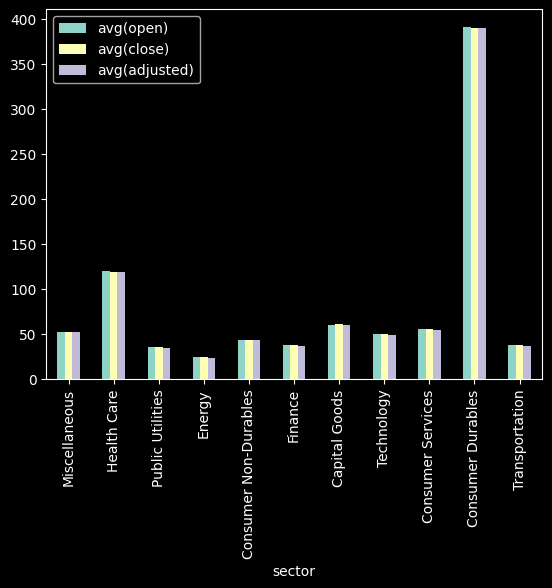

In [216]:
ind = list(range(12))
ind.pop(6)
data_pd.iloc[ind ,:].plot(x='sector', y = data_pd.columns.tolist()[1:], kind ='bar')

In [336]:
# Задача

# Отобразить изменение средних значений аудио характеристик от года к году.

# Такими характеристиками являются acousticness, danceability, energy, speechiness, liveness и valence . Произвести сортировку полученной таблицы по столбцу year по возрастанию. Средние значения округлить до 2-ух знаков после запятой.

# Примечание

# Вывести первые 5 строк, скопировать вывод и вставить в ответ (в ответ включить "only showing top 5 rows");

# Итоговая таблица должна иметь следующие названия столбцов:

In [316]:
df_exam = (
    spark.read.option("delimiter", ",")
    .option("header", True)
    .option("escape", '"')
    .csv("/content/drive/MyDrive/raw_githubusercontent.com_gabminamedez_spotify-data_master_data.csv")
)

In [318]:
df_exam.show()

+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+-------+----------------+--------+--------+-----------+-------+-------+----+---+----------+--------+
|                  id|                name|             artists|duration_ms|release_date|year|acousticness|danceability| energy|instrumentalness|liveness|loudness|speechiness|  tempo|valence|mode|key|popularity|explicit|
+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+-------+----------------+--------+--------+-----------+-------+-------+----+---+----------+--------+
|6KbQ3uYMLKb5jDxLF...|Singende Bataillo...| ['Carl Woitschach']|     158648|        1928|1928|       0.995|       0.708|  0.195|           0.563|   0.151| -12.428|     0.0506|118.469|  0.779|   1| 10|         0|       0|
|6KuQTIu1KoTTkLXKr...|Fantasiestücke, O...|['Robert Schumann...|     282133|        1928|1928|       0.994|       0.

In [320]:
df_exam.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- duration_ms: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- year: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- liveness: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- valence: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- key: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- explicit: string (nullable = true)



In [321]:
df_exam.createOrReplaceTempView("df_exam_view")

In [358]:
spark.sql("""

SELECT
    year,
    round(avg(acousticness),2) as acousticness,
    round(avg(danceability),2) as danceability,
    round(avg(energy),2) as energy,
    round(avg(liveness),2) as liveness,
    round(avg(speechiness),2) as speechiness,
    round(avg(valence),2) as valence
FROM df_exam_view
GROUP BY year
ORDER BY year ASC

""").show(truncate=False)

+----+------------+------------+------+--------+-----------+-------+
|year|acousticness|danceability|energy|liveness|speechiness|valence|
+----+------------+------------+------+--------+-----------+-------+
|1921|0.9         |0.43        |0.24  |0.22    |0.08       |0.43   |
|1922|0.94        |0.48        |0.24  |0.24    |0.12       |0.53   |
|1923|0.98        |0.57        |0.25  |0.24    |0.1        |0.62   |
|1924|0.94        |0.55        |0.35  |0.24    |0.09       |0.67   |
|1925|0.97        |0.57        |0.26  |0.24    |0.12       |0.62   |
|1926|0.74        |0.56        |0.24  |0.23    |0.31       |0.5    |
|1927|0.93        |0.65        |0.26  |0.17    |0.12       |0.66   |
|1928|0.95        |0.53        |0.21  |0.18    |0.14       |0.49   |
|1929|0.59        |0.65        |0.24  |0.24    |0.49       |0.64   |
|1930|0.94        |0.51        |0.33  |0.22    |0.08       |0.62   |
|1931|0.88        |0.56        |0.26  |0.24    |0.23       |0.57   |
|1932|0.94        |0.56        |0.

In [337]:
# Задача

# Найти количество произведений, выпущенных с 1951 года, в авторах которых присутствует "Sergei Rachmaninoff".

# Примечание

# Столбец о времени выпуска произведений использовать тот, который содержит в себе более полные данные.

In [334]:
schema = StructType(
    [
        StructField("id", StringType(), nullable=True),
        StructField("name", StringType(), True),
        StructField("artists", StringType(), True),
        StructField("duration_ms", DoubleType(), True),
        StructField("release_date", DateType(), True),
        StructField("year", IntegerType(), True),
        StructField("acousticness", StringType(), True),
        StructField("danceability", StringType(), True),
        StructField("energy", StringType(), True),
        StructField("instrumentalness", StringType(), True),
        StructField("liveness", StringType(), True),
        StructField("loudness", StringType(), True),
        StructField("speechiness", StringType(), True),
        StructField("tempo", StringType(), True),
        StructField("valence", StringType(), True),
        StructField("mode", StringType(), True),
        StructField("key", StringType(), True),
        StructField("popularity", DoubleType(), True),
        StructField("explicit", StringType(), True),
    ]
)

df_exam = (
    spark.read.option("delimiter", ",")
    .option("header", True)
    .option("escape", '"')
    .schema(schema)
    .csv("/content/drive/MyDrive/raw_githubusercontent.com_gabminamedez_spotify-data_master_data.csv")
)

In [335]:
df_exam.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- duration_ms: double (nullable = true)
 |-- release_date: date (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- liveness: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- valence: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- key: string (nullable = true)
 |-- popularity: double (nullable = true)
 |-- explicit: string (nullable = true)



In [349]:
df_exam.select(['artists', 'year'])\
.filter((f.col('artists')\
.like('%Sergei Rachmaninoff%')) & (f.col('year')>=1951))\
.count()

46

In [350]:
# Задача

# Найти наиболее популярных артистов (средняя популярность всех произведений, в которых упомянут артист).

# Выборку производить из тех артистов, у которых общее количество упоминаний в произведениях не менее 200.

In [390]:
df_exam.show()

+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+-------+----------------+--------+--------+-----------+-------+-------+----+---+----------+--------+
|                  id|                name|             artists|duration_ms|release_date|year|acousticness|danceability| energy|instrumentalness|liveness|loudness|speechiness|  tempo|valence|mode|key|popularity|explicit|
+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+-------+----------------+--------+--------+-----------+-------+-------+----+---+----------+--------+
|6KbQ3uYMLKb5jDxLF...|Singende Bataillo...| ['Carl Woitschach']|   158648.0|  1928-01-01|1928|       0.995|       0.708|  0.195|           0.563|   0.151| -12.428|     0.0506|118.469|  0.779|   1| 10|       0.0|       0|
|6KuQTIu1KoTTkLXKr...|Fantasiestücke, O...|['Robert Schumann...|   282133.0|  1928-01-01|1928|       0.994|       0.

In [400]:
df_exam.select(f.ArrayType(df_exam.name), f.explode(f.ArrayType(df_exam.artists)))

AssertionError: ignored